# Cart-Pole

Il Cart-Pole è un semplice sistema meccanico costituito da un'asta incernierata su un carrello che si muove su una rotaia.
<br>
Compito dell'agente è muovere il carrello in modo tale che l'asta rimanga in posizione approssimativamente verticale.
<br><br>
Nell'implementazione di Gym del Cart-Pole lo stato del sistema è definito da una tupla con quattro componenti descritte in tabella.
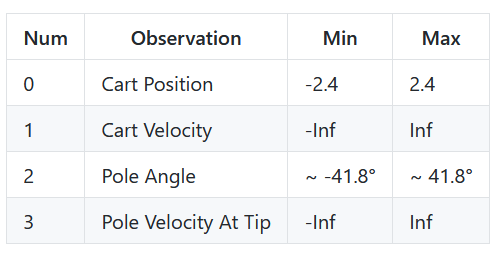
<br>
In ogni momento sono possibili due azioni: si spinge il carrelo verso destra o verso sinistra.

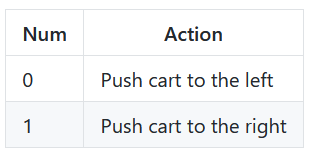
<br>

Un episodio termina quando si verifica una delle seguenti condizioni
1. L'angolo che l'asta forma con la verticale supera i 12 gradi.
2. La coordinata del carrello esce dall'intervallo $ [-2.4, 2.4 ] $ (il centro del carrello raggiunge il bordo dello schermo).
3. La lunghezza dell'episodio supera i 200 step.

<br>
Il video seguente mostra l'addestramento di un Cart-Pole meccanico tramite RL.
<a href="https://www.youtube.com/watch?v=Lt-KLtkDlh8">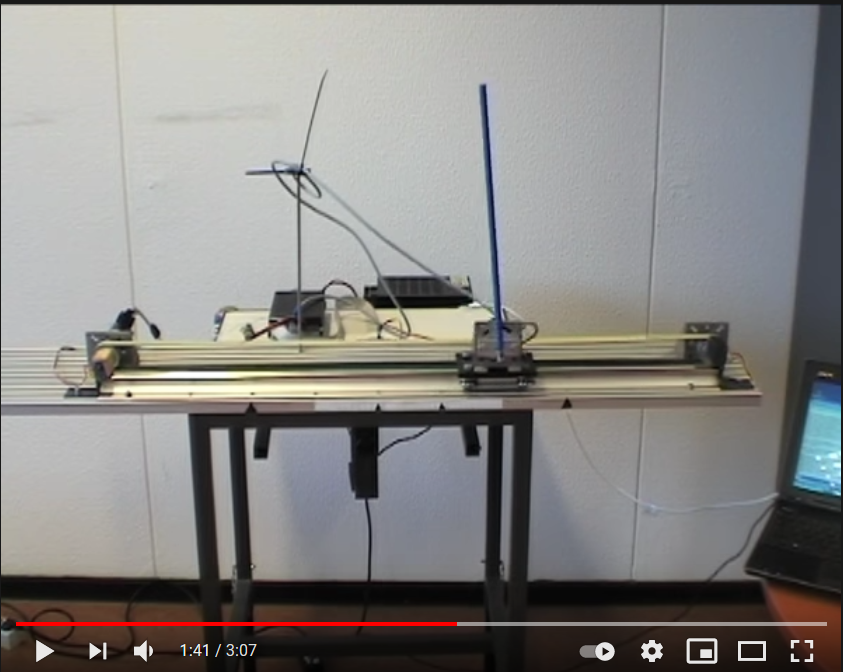</a>

In [ ]:
import gym
import random
from collections import defaultdict
import numpy as np
import time

# Esecuzione di  5 episodi del Cart-Pole prima dell'addestramento

In [ ]:
env = gym.make("CartPole-v0")

# produce 5 episodi
for i in range(5):
    done = False
    observation = env.reset()
    while not done:
        env.render()
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
    
    # 2 secondi di pausa alla fine di un episodio
    time.sleep(2)

env.close()

# Risoluzione del Cart-Pole con algoritmo Montecarlo

In [ ]:
def get_state(observation, delta):
    ''' Trasforma un'osservazione in uno stato tramite una discretizzazione uniforme
    
    args
    ----
    observation (np.array) - una tuple con i 4 parametri del Cart-Pole
    delta (float) - fattore di discretizzazione
    
    ret
    ---
    state (np.array) - tupla discretizzata che rappresenta lo stato'''
    return tuple(observation // delta)

In [ ]:
def get_epsilon_greedy_action(state, q, epsilon):
    ''' Data una funzione di valore q restituisce un'azione con algoritmo
    epsilon-greedy
    
    args
    ----
    state (np.array) - stato del Cart-Pole
    q (dict) - dizionario che rappresenta la funzione di valutazione stato-azione
    epsilon (float) - è la probabilità che l'azione venga scelta a caso
    
    ret
    ---
    action (int) - l'azione scelta'''
    pass

In [ ]:
q = defaultdict(lambda: {0:0, 1:0})

In [ ]:
def cartpole_montecarlo_train(cartpole_env, q, num_episodes, alpha, epsilon0, epsilon_decay, delta, render):
    ''' Addestra l'agente a risolvere il Cart-Pole con l'algoritmo Montecarlo 
    
    args
    ----
    cartpole_env (gym env) - l'ambiente del Cart-Pole
    q (dict) - una funzione di valutazione iniziale
    num_episodes (int) - numero di episodi da generare per l'addestramento
    alpha (float) - learning rate
    epsilon0 (float) - epsilon iniziale
    epsilon_decay (float) - fattore di decadimento di epsilon dopo ogni episodio
    delta (float) - fattore di discretizzazione per la creazione degli stati dalle osservazioni
    render (bool) - Se True l'addestramento viene visualizzato
    
    ret
    ---
    q (dict) - la funzione di valutazione finale'''
    pass

In [ ]:
env = gym.make("CartPole-v0")
q_after_train = cartpole_montecarlo_train(env, 
                          q=defaultdict(lambda: {0:0, 1:0}), 
                          num_episodes=1_000, 
                          alpha=0.05, 
                          epsilon0=0.9, 
                          epsilon_decay=0.99, 
                          delta=0.5, 
                          render=False)

# Cart-Pole addestrato

In [ ]:
env = gym.make("CartPole-v0")

# produce 5 episodi
for i in range(5):
    done = False
    observation = env.reset()
    while not done:
        env.render()
        state = get_state(observation, delta=0.5)
        action = get_epsilon_greedy_action(state, q_after_train, 0)
        observation, reward, done, info = env.step(action)
    
    # 2 secondi di pausa alla fine di un episodio
    time.sleep(2)

env.close()